# Movie Genre Data Analysis


## Research Questions (Q):

Which genres are the most common (number of movies made)?

Which genres have high avg. budget and revenue?

Which genres have high avg. popularity?

Which genres have highest number of movies with an voting avg. >=8?

## Research Hypotheses (H):

The best movies according to vote avg. return high profit and revenue.

The best movies according to popularity return high profit and revenue.

Highly budgeted movies return high revenue and profit.

Highly budgeted movies have a high popularity.



In [5]:
import pandas as pd 

In [9]:
movies = pd.read_csv(r"C:\Users\Guney\Desktop\analystbuilder\movie genre data analysis project\imdb_movies.csv")

In [15]:
pd.set_option("display.max.rows", 11000)
pd.set_option("display.max.columns", 22)

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# Remove duplicates

In [23]:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [25]:
movies.drop_duplicates(inplace = True)

# Drop NA Genres

In [29]:
movies.dropna(subset = ["genres"], inplace = True)

# Create a Profit Column

In [32]:
movies["profit"] = movies["revenue"] - movies["budget"]

## Drop the columns that not useful for the Q and Hs

In [84]:
movies_genre = movies[["popularity", "budget","revenue", "original_title", "runtime","genres","release_date", "vote_count", "vote_average", "profit"]]

In [86]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


## Split the Genre data

In [88]:
from pandas import Series, DataFrame



In [90]:
split = movies_genre["genres"].str.split("|").apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = "genres_split"
del movies_genre["genres"]
movies_genre = movies_genre.join(split)

In [92]:
movies_genre

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Comedy


# Most Common Genre

In [109]:
genres_count = pd.DataFrame(movies_genre.groupby("genres_split").original_title.nunique()).sort_values("original_title", ascending = False)

In [111]:
genres_count

,original_title
genres_split,
Drama,4672
Comedy,3750
Thriller,2841
Action,2339
Romance,1686
Horror,1580
Adventure,1442
Crime,1337
Family,1211


<Axes: title={'center': 'Movies per Genre in %'}, ylabel='original_title'>

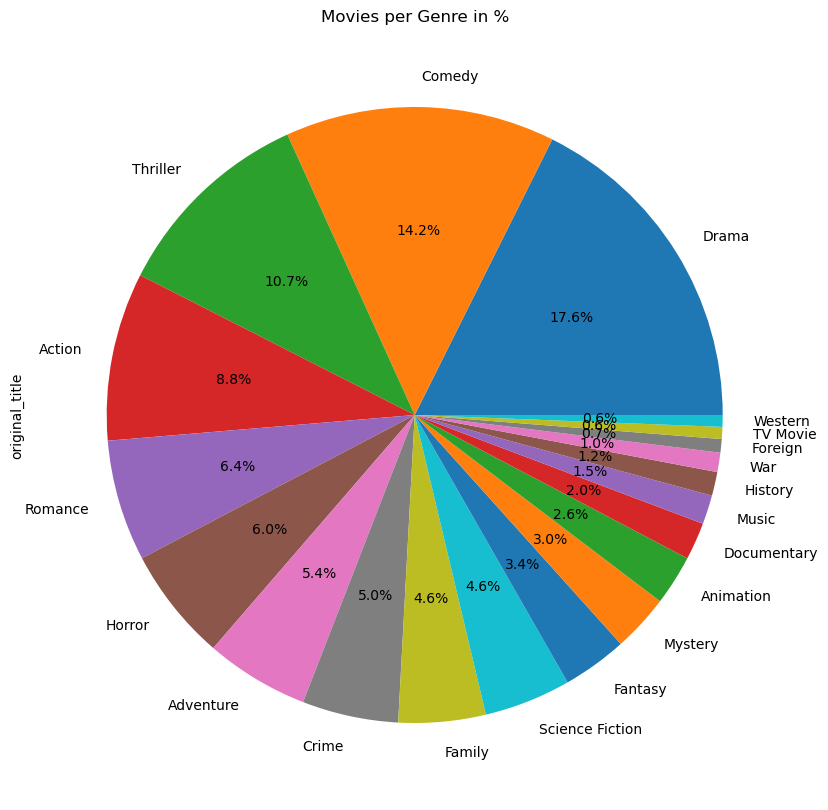

In [115]:
genres_count["original_title"].plot.pie(title = "Movies per Genre in %", autopct = "%1.1f%%", figsize = (10,10))

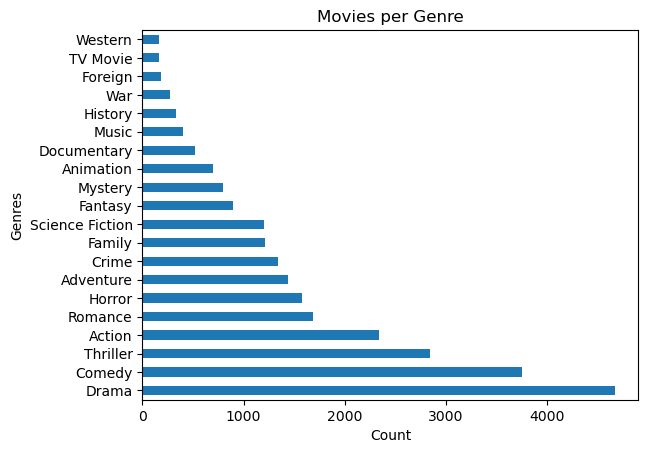

In [129]:
import matplotlib.pyplot as plt

ax = genres_count["original_title"].plot.barh()
ax.set_title("Movies per Genre")
ax.set_xlabel("Count")
ax.set_ylabel("Genres")
plt.show()

## Genres have high average budget and revenue

In [138]:
genres_avg = movies_genre.groupby("genres_split").mean(numeric_only=True)
pd.options.display.float_format = "{:2f}".format
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624


In [161]:
genres_avg.sort_values("revenue", inplace = True, ascending = True)

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

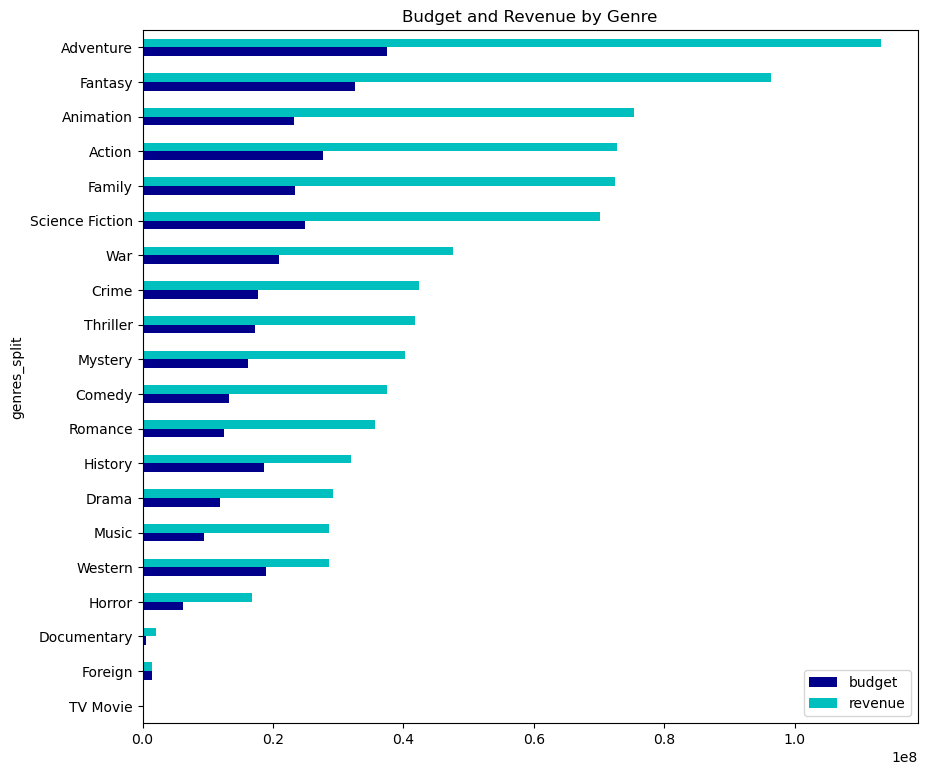

In [163]:
genres_avg[["budget", "revenue"]].plot.barh(title = "Budget and Revenue by Genre", color = ("DarkBlue", "c"), figsize = (10,9))

## Highest average Profit

In [ ]:
genres_avg.sort_values("profit", inplace = True, ascending = True)

<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

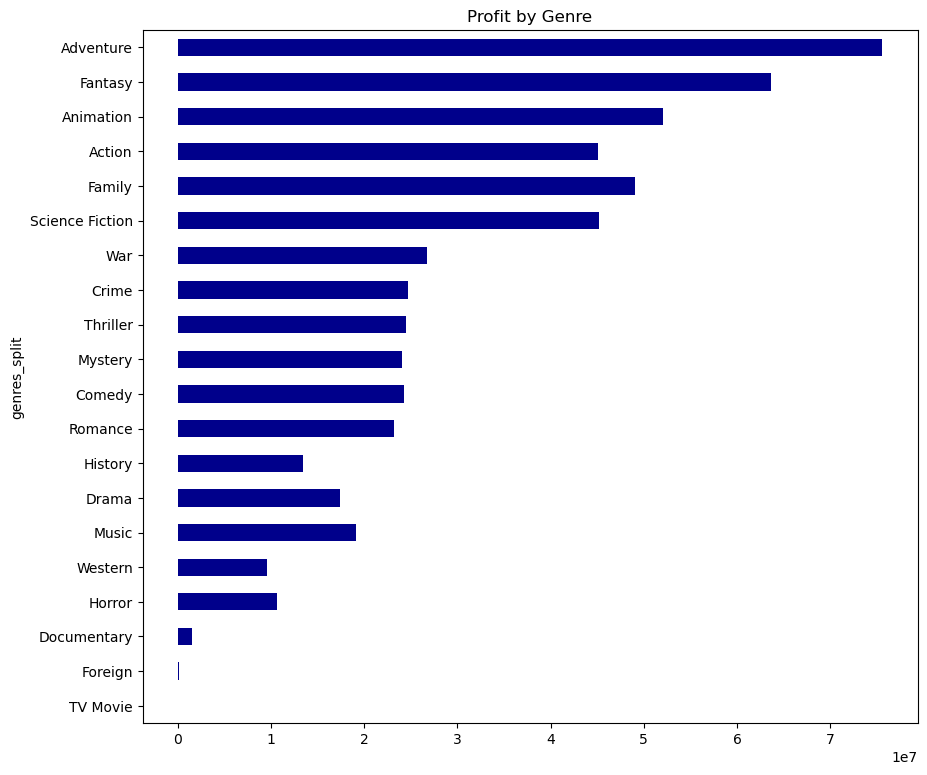

In [166]:
genres_avg["profit"].plot.barh(title = "Profit by Genre", color = ("DarkBlue"), figsize = (10,9))

## Highest average Popularity

In [171]:
genres_avg.sort_values("popularity", inplace = True, ascending = True)

<Axes: title={'center': 'Popularity by Genre'}, ylabel='genres_split'>

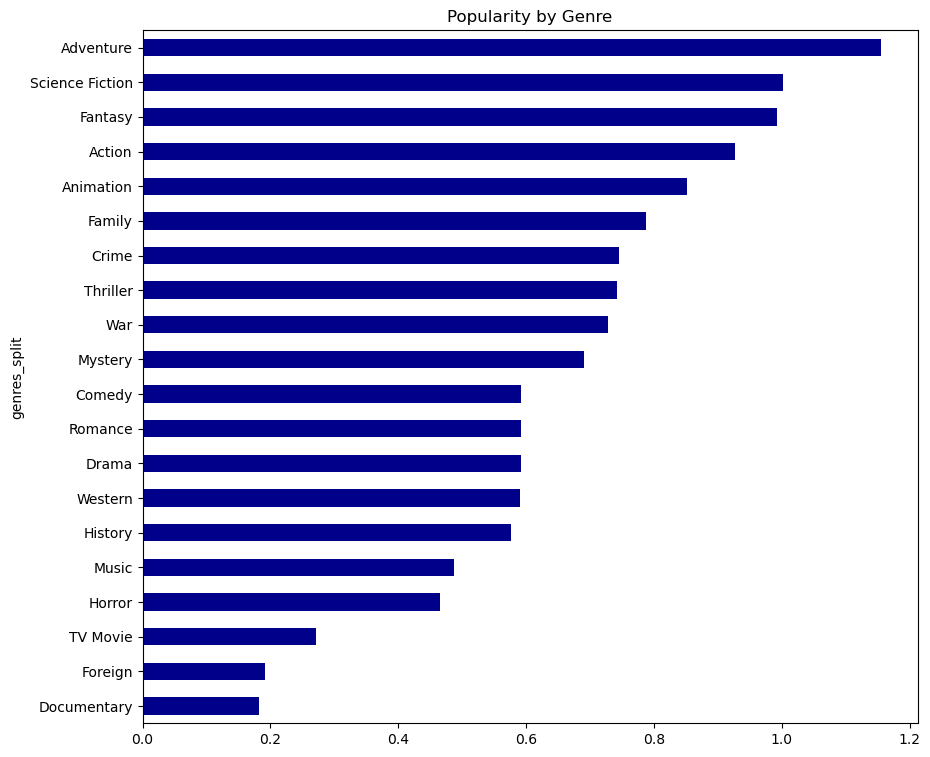

In [173]:
genres_avg["popularity"].plot.barh(title = "Popularity by Genre", color = ("DarkBlue"), figsize = (10,9))

## Genres that have highest number of movies with average voting >= 8

In [176]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Action


### Filter the data and only include movies have >= 50 vote count

In [188]:
vote_fifty = movies_genre[(movies_genre["vote_count"] >= 50) & (movies_genre["vote_average"] >=8)]
vote_zero =  movies_genre[movies_genre["vote_average"] >=8]

In [204]:
genres_vote = pd.DataFrame(vote_fifty.groupby("genres_split").vote_average.nunique()).sort_values("vote_average", ascending = True)

In [208]:
genres_vote

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

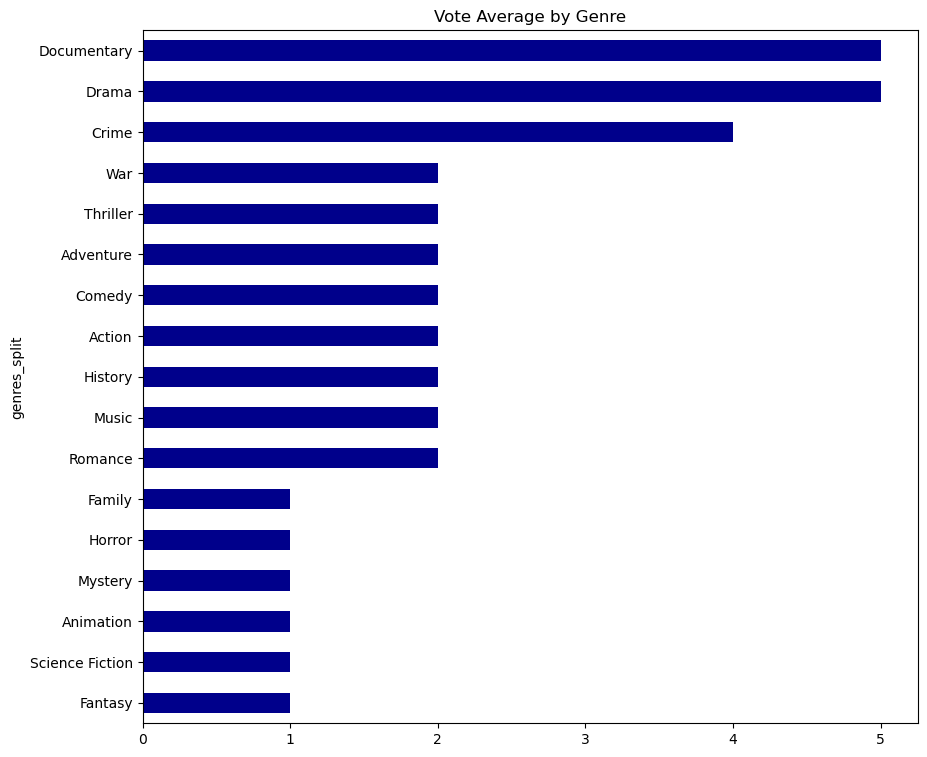

In [206]:
genres_vote["vote_average"].plot.barh(title = "Vote Average by Genre", color = ("DarkBlue"), figsize = (10,9))

# Hypotheses

The best movies according to vote avg. return high profit and revenue.

The best movies according to popularity return high profit and revenue.

Highly budgeted movies return high revenue and profit.

Highly budgeted movies have a high popularity.

In [216]:
movies = pd.read_csv(r"C:\Users\Guney\Desktop\analystbuilder\movie genre data analysis project\imdb_movies.csv")
movies.drop_duplicates(inplace = True)
movies["profit"] = movies["revenue"] - movies["budget"]
movies_genre = movies[["popularity", "budget","revenue", "original_title", "runtime","genres","release_date", "vote_count", "vote_average", "profit"]]

In [220]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


## The best movies according to vote avg. return high profit and revenue.

In [225]:
movies_counted = movies_genre[movies_genre["vote_count"] >= 50]

In [231]:
movies_counted_numeric = movies_counted.select_dtypes(include='number')
correlation_matrix = movies_counted_numeric.corr(method="spearman")
correlation_matrix

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.485149,0.588739,0.230518,0.768966,0.188670,0.498117
budget,0.485149,1.000000,0.714828,0.360230,0.554586,-0.044440,0.334390
revenue,0.588739,0.714828,1.000000,0.341707,0.682656,0.111731,0.842221
runtime,0.230518,0.360230,0.341707,1.000000,0.263460,0.285514,0.212060
vote_count,0.768966,0.554586,0.682656,0.263460,1.000000,0.284470,0.583602
vote_average,0.188670,-0.044440,0.111731,0.285514,0.284470,1.000000,0.198308
profit,0.498117,0.334390,0.842221,0.212060,0.583602,0.198308,1.000000


<Axes: xlabel='vote_average', ylabel='profit'>

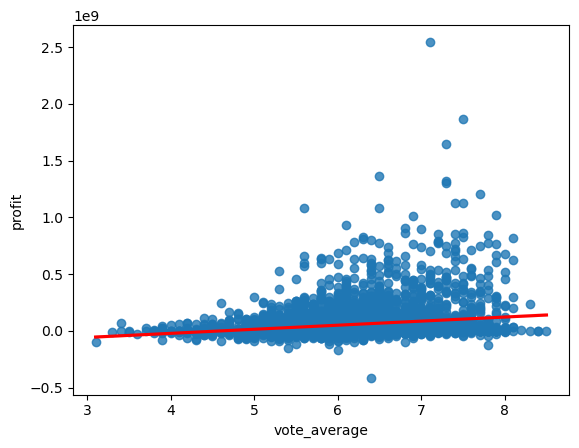

In [235]:
import seaborn as sns

sns.regplot(data = movies_counted, x="vote_average", y="profit", line_kws = {"color": "red"} )



<Axes: xlabel='vote_average', ylabel='revenue'>

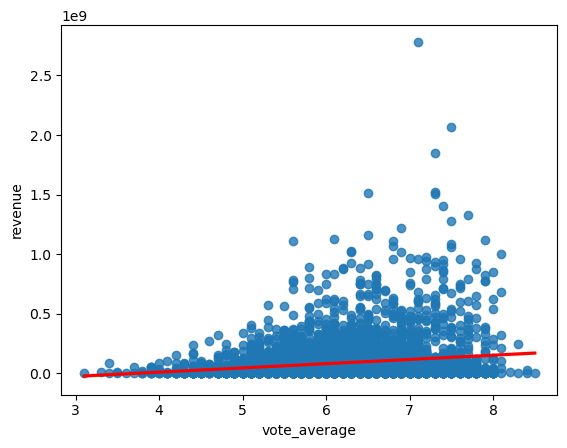

In [242]:
sns.regplot(data = movies_counted, x="vote_average", y="revenue", line_kws = {"color": "red"} )


### The best movies according to popularity return high profit and revenue.


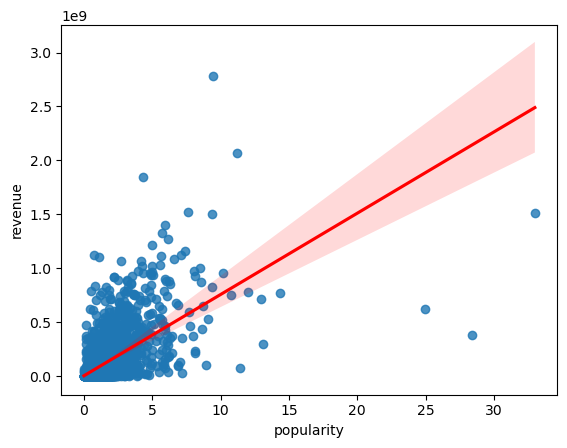

<Figure size 2000x1000 with 0 Axes>

In [246]:
sns.regplot(data = movies_counted, x="popularity", y="revenue", line_kws = {"color": "red"} )
plt.figure(figsize = (20,10))
plt.show()


### Highly budgeted movies return high profit.


In [248]:
movies_counted.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


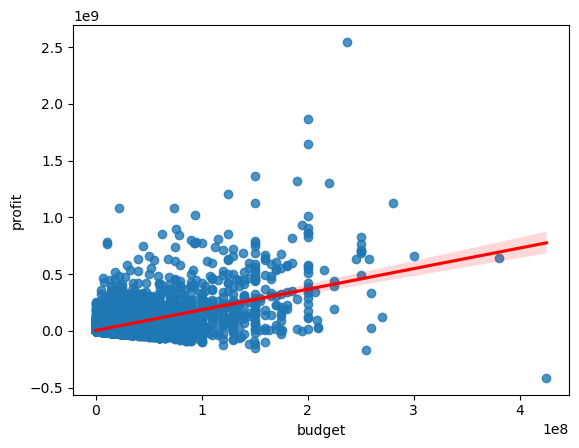

<Figure size 2000x1000 with 0 Axes>

In [251]:
sns.regplot(data = movies_counted, x="budget", y="profit", line_kws = {"color": "red"} )
plt.figure(figsize = (20,10))
plt.show()


### Highly budgeted movies have a high popularity.

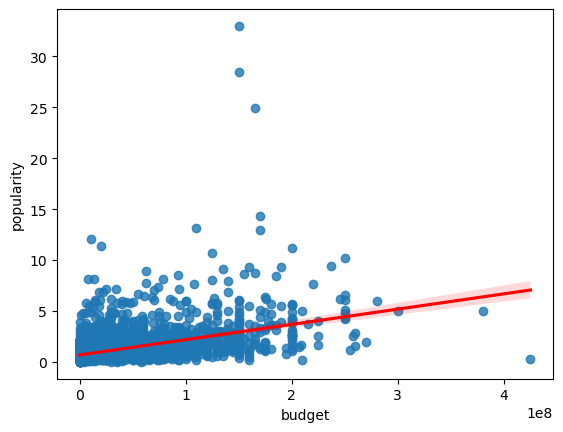

<Figure size 2000x1000 with 0 Axes>

In [253]:
sns.regplot(data = movies_counted, x="budget", y="popularity", line_kws = {"color": "red"} )
plt.figure(figsize = (20,10))
plt.show()


# Profit per Genre by Year

In [258]:
movies_genre = movies[["popularity", "budget","revenue", "original_title", "runtime","genres","release_year", "vote_count", "vote_average", "profit"]]
split = movies_genre["genres"].str.split("|").apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = "genres_split"
del movies_genre["genres"]
movies_genre = movies_genre.join(split)

In [260]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action


In [265]:
time_genre = pd.DataFrame(movies_genre.groupby(["release_year","genres_split"])["profit"].mean())

In [267]:
time_genre

profit
release_year genres_split                    
1960         Action            6363125.000000
             Adventure          431000.000000
             Comedy            5258750.000000
             Crime                   0.000000
             Drama             8245619.384615
             Family            3333333.333333
             Fantasy           -375000.000000
             Foreign                 0.000000
             History           9600000.000000
             Horror            4389007.428571
             Music                   0.000000
             Romance           5225000.000000
             Science Fiction   -316666.666667
             Thriller          5028842.000000
             War                     0.000000
             Western            484166.666667
1961         Action            2457142.857143
             Adventure        39130002.333333
             Animation       211880014.000000
             Comedy           22198001.400000
             Crime            18828411.000000
             Drama             4912698.375000
             Family           42576002.800000
             Fantasy                 0.000000
             Foreign                 0.000000
             History           2333333.333333
             Horror             600000.000000
             Music            18828411.000000
             Mystery                 0.000000
             Romance            214285.714286
             Science Fiction         0.000000
             War              11450000.000000
             Western           -566666.666667
1962         Action           10437500.000000
             Adventure        21214285.714286
             Comedy            1599974.800000
             Crime             3709948.666667
             Drama             4373796.190476
             Family            4000000.000000
             Fantasy              -126.000000
             Foreign              -126.000000
             History          11250000.000000
             Horror             231600.000000
             Music             8000000.000000
             Mystery           -245000.000000
             Romance           -400025.200000
             Science Fiction    -31000.000000
             Thriller          7902857.142857
             War              15000000.000000
             Western          13266666.666667
1963         Action           14999691.250000
             Adventure         9428395.000000
             Animation               0.000000
             Comedy             765591.923077
             Crime              369526.750000
             Drama             1587307.692308
             Family            -333333.333333
             Fantasy           -500000.000000
             Foreign                 0.000000
             History           4908750.000000
             Horror             898558.777778
             Mystery           1568014.666667
             Romance           4388698.500000
             Science Fiction   -375000.000000
             Thriller          8612335.300000
             War               1000000.000000
             Western                 0.000000
1964         Action           24280000.000000
             Adventure        24123400.000000
             Animation               0.000000
             Comedy            7080111.375000
             Crime             1723307.300000
             Drama             3726105.550000
             Family           37818181.750000
             Fantasy          24068181.750000
             Foreign                 0.000000
             History                 0.000000
             Horror             -10833.333333
             Music            30354655.200000
             Mystery           1216209.750000
             Romance           6722222.222222
             Science Fiction   -300000.000000
             Thriller         14029426.555556
             War               2546757.333333
             Western                 0.000000
1965         Action           1610450

In [273]:
final_genre = pd.pivot_table(time_genre, values = "profit", index = ["genres_split"], columns = ["release_year"])

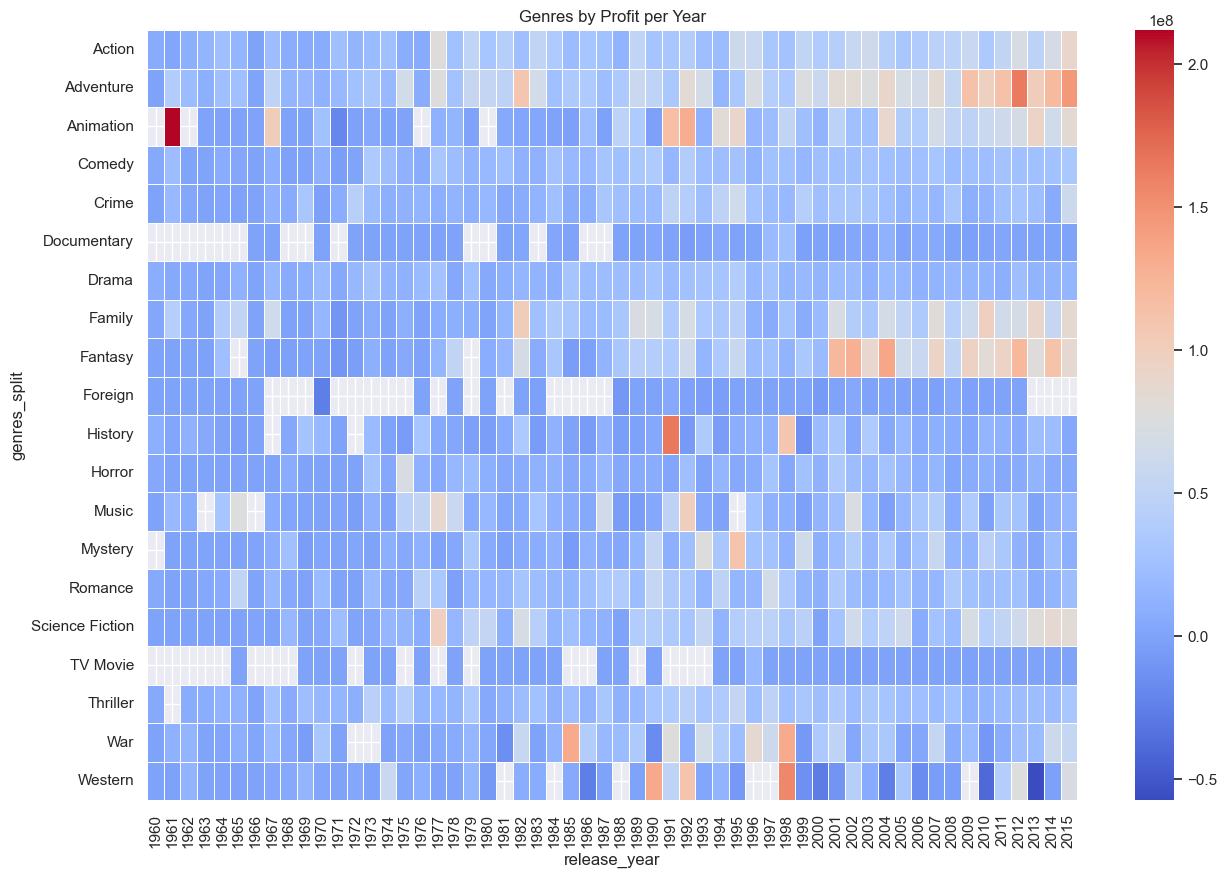

In [279]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.heatmap(final_genre, cmap="coolwarm", linewidths=0.5)
plt.title("Genres by Profit per Year")
plt.show()